In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random


In [122]:
euro = "data/Euro_6_CLEAN.csv"
euro_df = pd.read_csv(euro, encoding='ANSI')
euro_df

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2
0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,161.0
1,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,153.0
2,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,169.0
3,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,162.0
4,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,02-Jul-21,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,76.0
6330,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,57.0
6331,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,76.0
6332,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,57.0


In [123]:
euro_emissions = euro_df.groupby(['Manufacturer', 'Model', 'Description'], as_index=False).mean()


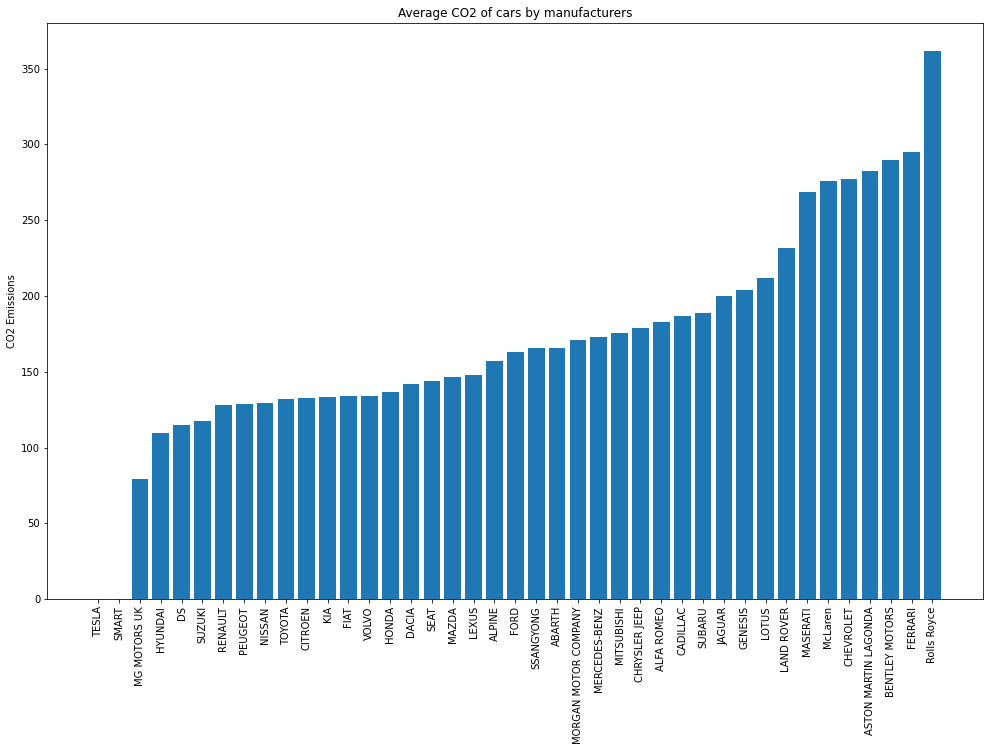

In [124]:
manu_emissions = euro_emissions.groupby(['Manufacturer'], as_index=False).mean().sort_values(by='Cleaned CO2')
manu_emissions = manu_emissions[['Manufacturer', 'Cleaned CO2']]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(manu_emissions["Manufacturer"],manu_emissions["Cleaned CO2"])
ax.set_ylabel('CO2 Emissions')
ax.set_title('Average CO2 of cars by manufacturers')

plt.xticks(manu_emissions["Manufacturer"], rotation='vertical')
fig.set_figheight(8)
fig.set_figwidth(13)
plt.show()


In [125]:
emissions_superstars_pooperstars = []
for n in range (0, 3):
    emissions_superstars_pooperstars.append(manu_emissions.iloc[n]['Manufacturer'])
    
for n in range (len(manu_emissions)-3, len(manu_emissions)):
    emissions_superstars_pooperstars.append(manu_emissions.iloc[n]['Manufacturer'])
    
print(emissions_superstars_pooperstars)

['TESLA', 'SMART', 'MG MOTORS UK', 'BENTLEY MOTORS', 'FERRARI', 'Rolls Royce']


In [126]:
cars = []
euro_emissions_crop = euro_emissions[['Manufacturer', 'Model', 'Description', 'Cleaned CO2']]

for manufacturer in emissions_superstars_pooperstars:
    carDF = euro_emissions_crop.loc[((euro_emissions_crop["Manufacturer"] == manufacturer ))]
    carDF.sort_values(by="Cleaned CO2", ascending=True)
    cars.append(carDF) 

cars

[     Manufacturer    Model                     Description  Cleaned CO2
 3279        TESLA  Model 3           Long Range (E3CD#Gb1)          0.0
 3280        TESLA  Model 3           Long Range (E3LD#Gb1)          0.0
 3281        TESLA  Model 3            Long Range (E5D##b1)          0.0
 3282        TESLA  Model 3           Performance (E3LD##p)          0.0
 3283        TESLA  Model 3            Performance (E5D#Gp)          0.0
 3284        TESLA  Model 3  Standard Range Plus (E1CR#Gb1)          0.0
 3285        TESLA  Model 3  Standard Range Plus (E1LR#Gb1)          0.0
 3286        TESLA  Model 3   Standard Range Plus (E6R#Gb1)          0.0
 3287        TESLA  Model S              Long Range (SA3EB)          0.0
 3288        TESLA  Model S             Performance (SA3EP)          0.0
 3289        TESLA  Model X              Long Range (XA3EB)          0.0
 3290        TESLA  Model X             Performance (XA3EP)          0.0,
      Manufacturer                            Mode

In [127]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = [capomulin, ramicane, infubinol, ceftamin]


# Create empty list to fill with emissions data (for plotting)
outliers = []
quartile_sum = pd.DataFrame({})
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for brand in cars:
    #instantiate q0->5
    quartiles = brand["Cleaned CO2"].quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    median = quartiles[0.5]    
    upperq = quartiles[0.75]
    lowest = brand["Cleaned CO2"].min()
    highest = brand["Cleaned CO2"].max()
    
    iqr = upperq-lowerq
    
    #outlier check
    #HANG ON surely this can be done simpler with booleans
    x = brand.loc[brand["Cleaned CO2"] < (lowerq - iqr*1.5)]
    if len(x) > 0:
        outliers.append(x["Description"])
        
    x = brand.loc[brand["Cleaned CO2"] > (upperq + iqr*1.5)]
    if len(x) >0:
        outliers.append(x["Description"])
        
#investigate a better way to do this...
    cardict = {"brand": brand["Manufacturer"], 
                "Q0": round(lowest, 1), 
                "Q1": round(lowerq, 1), 
                "Q2": round(median, 1), 
                "Q3": round(upperq, 1), 
                "Q4": round(highest, 1)}   
    quartile_sum = quartile_sum.append(cardict, ignore_index=True)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
print(f"there are {len(outliers)} outliers in the data: {outliers}")
    # add subset 
    
# # format nicely    
quartile_sum = quartile_sum.transpose()
# quartile_sum.columns = quartile_sum.iloc[0] 
# quartile_sum = quartile_sum[1:]
quartile_sum



there are 1 outliers in the data: [110    Bentayga Hybrid
Name: Description, dtype: object]


,0,1,2,3,4,5
brand,3279 TESLA 3280 TESLA 3281 TESLA 3282...,3199 SMART 3200 SMART 3201 SMART 3202...,2474 MG MOTORS UK 2475 MG MOTORS UK 2476...,110 BENTLEY MOTORS 111 BENTLEY MOTORS 11...,415 FERRARI 416 FERRARI 417 FERRARI 4...,3004 Rolls Royce 3005 Rolls Royce 3006 ...
Q0,0.0,0.0,0.0,82.0,154.0,353.0
Q1,0.0,0.0,0.0,281.0,270.8,353.5
Q2,0.0,0.0,43.0,288.0,293.0,362.0
Q3,0.0,0.0,152.2,320.0,366.0,367.8
Q4,0.0,0.0,174.0,340.0,373.0,376.5


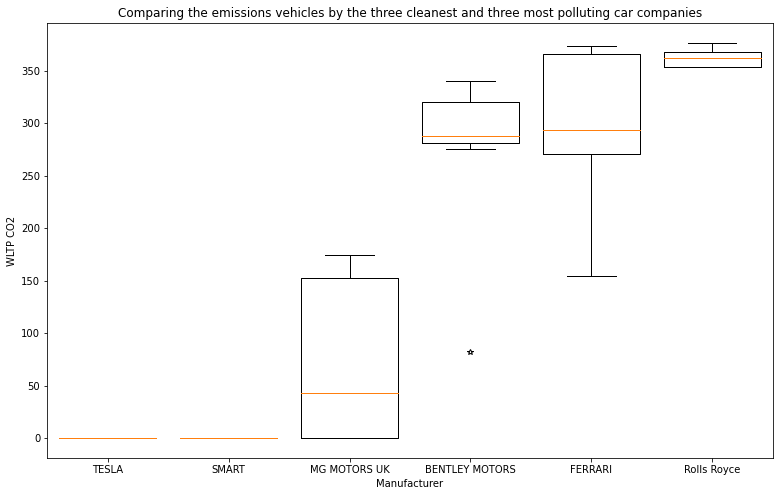

In [128]:
# Generate a box plot for each car manufacturer, of the CO2 emissions of their various vehicles.

    
data = []

for car in cars:
    data.append(car["Cleaned CO2"])

fig, ax = plt.subplots()
ax.set_title('Comparing the emissions vehicles by the three cleanest and three most polluting car companies')
ax.boxplot(data, labels = emissions_superstars_pooperstars, sym="*", widths=(0.8))

plt.xlabel("Manufacturer")
plt.ylabel("WLTP CO2")


fig.set_figheight(8)
fig.set_figwidth(13)
plt.show()
